In [2]:
import matplotlib.pyplot as plt
import matplotlib.patches as pat
import numpy as np
from matplotlib import animation
from matplotlib.colors import Normalize
import matplotlib.cm as cm
import matplotlib.colors as col
import matplotlib
from tqdm import tqdm

In [3]:
sigma1color = 'orange'
sigma2color = 'royalblue'
sigmacolor = 'r'

transversecolor = sigma1color#'grey'
attractivecolor = 'g'
repulsivecolor = 'r'

trajectorycolor = 'black'

inferno = plt.cm.inferno(np.linspace(0,1,100))
viridis = plt.cm.viridis(np.linspace(0,1,100))
my_color = viridis #np.vstack((white,inferno))
my_cmap = col.LinearSegmentedColormap.from_list('my_map', my_color)

def norm2(U,V):
    return np.sqrt(U**2+V**2)

In [4]:
defaultfigsize = (15,7.5)
tripledefaultfigsize = (20,10)
smallerfigsize = (10,8)
largerfigsize = (16,8)
longerfigsize = (14,8)
squarefigsizelarge = (9,8)

thinner_line = 0.75
thicker_line = 1

Cross PWS

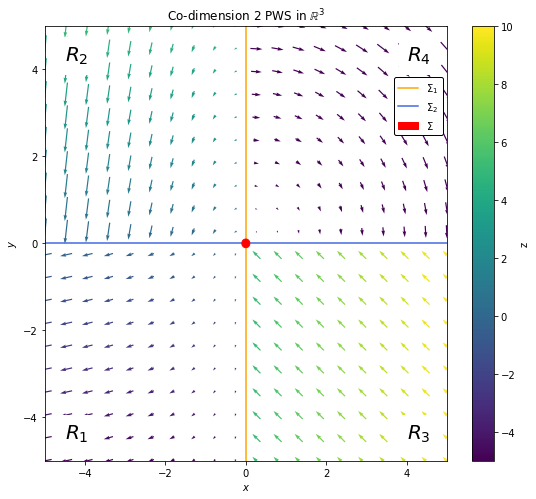

In [5]:
xvals = np.linspace(-5,5,20)
yvals = np.linspace(-5,5,20)
x,y = np.meshgrid(xvals,yvals)

def h1(x):
    return x[0]
def h2(x):
    return x[1]

def R1(x,y):
    return  np.array([x,-1,y])
def R2(x,y):
    return  np.array([-1,+2*x,y])
def R3(x,y):
    return  np.array([-3,3,5+x])
def R4(x,y):
    return  np.array([y,-x,-5])

def discts_field_pw_cons(x,y):
    xy = (x,y)
    ur1 = np.where((h1(xy) < 0) & (h2(xy) < 0), R1(x,y)[0] ,0)
    ur2 = np.where((h1(xy) < 0) & (h2(xy) > 0), R2(x,y)[0] ,0)
    ur3 = np.where((h1(xy) > 0) & (h2(xy) < 0), R3(x,y)[0] ,0)
    ur4 = np.where((h1(xy) > 0) & (h2(xy) > 0), R4(x,y)[0] ,0)
    ufield = ur1+ur2+ur3+ur4
        
    vr1 = np.where((h1(xy) < 0) & (h2(xy) < 0), R1(x,y)[1] ,0)
    vr2 = np.where((h1(xy) < 0) & (h2(xy) > 0), R2(x,y)[1] ,0)
    vr3 = np.where((h1(xy) > 0) & (h2(xy) < 0), R3(x,y)[1] ,0)
    vr4 = np.where((h1(xy) > 0) & (h2(xy) > 0), R4(x,y)[1] ,0)
    vfield = vr1+vr2+vr3+vr4
    
    zr1 = np.where((h1(xy) < 0) & (h2(xy) < 0), R1(x,y)[2] ,0)
    zr2 = np.where((h1(xy) < 0) & (h2(xy) > 0), R2(x,y)[2] ,0)
    zr3 = np.where((h1(xy) > 0) & (h2(xy) < 0), R3(x,y)[2] ,0)
    zr4 = np.where((h1(xy) > 0) & (h2(xy) > 0), R4(x,y)[2] ,0)
    zfield = zr1+zr2+zr3+zr4
    
    return ufield,vfield,zfield


fig, ax = plt.subplots(1, figsize=squarefigsizelarge)
ax.set_xlabel('$x$')
ax.set_ylabel('$y$')


plt.title("Co-dimension 2 PWS in $\mathbb{R}^3$")
    
#vector field
u,v,z = discts_field_pw_cons(x,y)
vector_field = plt.quiver(x,y,u, v, z,cmap=my_cmap,pivot='mid')

#separating surfaces
plt.plot(0*yvals,yvals,label = '$\Sigma_1$',color=sigma1color)
plt.plot(xvals,0*xvals,label = '$\Sigma_2$',color=sigma2color)
# discontinuity surface
dot = plt.Circle((0, 0), 0.1, facecolor=sigmacolor, edgecolor=sigmacolor,label = '$\Sigma$',zorder=10)
ax.add_patch(dot)
#labels
plt.text(-4.5,-4.5,'$R_1$',backgroundcolor = 'w',fontsize = 20)
plt.text(-4.5,4.2,'$R_2$',backgroundcolor = 'w',fontsize = 20)
plt.text(4,-4.5,'$R_3$',backgroundcolor = 'w',fontsize = 20)
plt.text(4,4.2,'$R_4$',backgroundcolor = 'w',fontsize = 20)




fig.colorbar(vector_field,label = 'z')

legend = plt.legend(loc = (.87,.75),edgecolor="black")
legend.get_frame().set_alpha(1)

ax.margins(x=0,y=0)

Circle PWS

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: RuntimeWarning: invalid value encountered in true_divide
  # Remove the CWD from sys.path while we load stuff.
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:12: RuntimeWarning: invalid value encountered in true_divide
  if sys.path[0] == '':


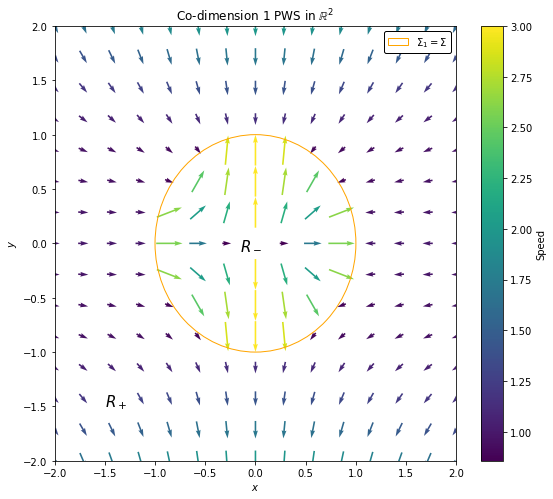

In [12]:
xvals = np.linspace(-2,2,15)
yvals = np.linspace(-2,2,15)
x,y = np.meshgrid(xvals,yvals)

def h1(x):
    x,y = x[0],x[1]
    return x**2 + y**2 - 1

def circle_inside(x,y):
    return  3*np.array([x**2,y])/norm2(x,y)
def circle_outside(x,y):
    return  np.array([-x,-y**2])/norm2(x,y)

def discts_field_circle(x,y):
    xy = (x,y)
    u_inside = np.where((h1(xy) < 0), circle_inside(x,y)[0] ,0)
    u_outside = np.where((h1(xy) > 0), circle_outside(x,y)[0] ,0)
    ufield = u_inside + u_outside
        
    v_inside = np.where((h1(xy) < 0), circle_inside(x,y)[1] ,0)
    v_outside = np.where((h1(xy) > 0), circle_outside(x,y)[1] ,0)
    vfield = v_inside + v_outside
    
    return ufield,vfield

fig, ax = plt.subplots(1, figsize=squarefigsizelarge)
ax.set_xlabel('$x$')
ax.set_ylabel('$y$')

#vector field

u,v = discts_field_circle(x,y) 
vector_field = plt.quiver(x,y, u , v , norm2(u,v),cmap=my_cmap,pivot='mid')


plt.title("Co-dimension 1 PWS in $\mathbb{R}^2$")

#separating surfaces
circ = plt.Circle((0, 0), 1, facecolor='none', edgecolor=sigma1color,label = '$\Sigma_1 = \Sigma$')
ax.add_patch(circ)

#labels
r1circ = plt.text(-0.15,-0.05,'$R_-$',fontsize = 15)
r1circ.set_bbox(dict(facecolor='w', alpha=0.75, edgecolor='white'))

plt.text(-1.5,-1.5,'$R_+$',backgroundcolor = 'w',fontsize = 15)


fig.colorbar(vector_field,label = 'Speed')

legend = plt.legend(loc= 'upper right',edgecolor="black")
legend.get_frame().set_alpha(1)

ax.margins(x=0,y=0)

Simple PWS

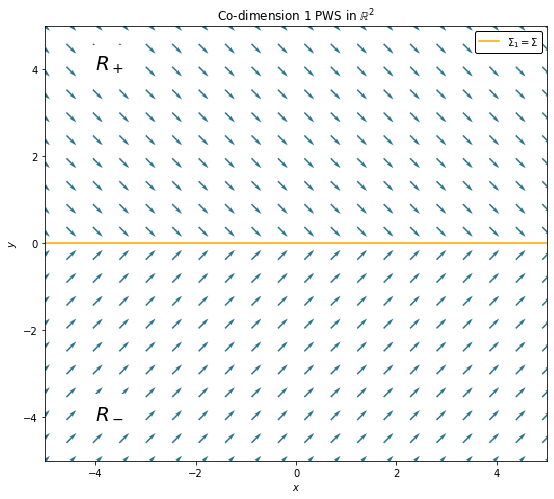

In [123]:
xvals = np.linspace(-5,5,20)
yvals = np.linspace(-5,5,20)
x,y = np.meshgrid(xvals,yvals)

def h1(x):
    return x[1]

def R1(x,y):
    return  np.array([+1,-1])
def R2(x,y):
    return  np.array([+1,+1])


def discts_field_simple(x,y):
    xy = (x,y)
    ur1 = np.where((h1(xy) > 0), R1(x,y)[0] ,0)
    ur2 = np.where((h1(xy) < 0), R2(x,y)[0] ,0)
    ufield = ur1+ur2
        
    vr1 = np.where((h1(xy) > 0), R1(x,y)[1] ,0)
    vr2 = np.where((h1(xy) < 0), R2(x,y)[1] ,0)
    vfield = vr1+vr2
    
    
    return ufield,vfield


fig, ax = plt.subplots(1, figsize=squarefigsizelarge)
ax.set_xlabel('$x$')
ax.set_ylabel('$y$')


plt.title("Co-dimension 1 PWS in $\mathbb{R}^2$")
    
#vector field
u,v = discts_field_simple(x,y)
vector_field = plt.quiver(x,y,u, v, color = my_cmap(100),pivot='mid')

#separating surfaces
plt.plot(xvals,0*xvals,label = '$\Sigma_1 = \Sigma$',color=sigma1color)
#labels
plt.text(-4,+4,'$R_+$',backgroundcolor = 'w',fontsize = 20)
plt.text(-4,-4,'$R_-$',backgroundcolor = 'w',fontsize = 20)

legend = plt.legend(edgecolor="black")
legend.get_frame().set_alpha(1)

ax.margins(x=0,y=0)

Circle PWS with sliding regions labelled

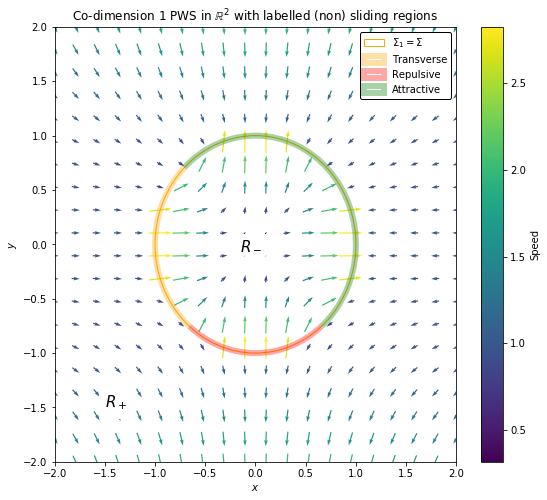

In [13]:
xvals = np.linspace(-2,2,20)
yvals = np.linspace(-2,2,20)
x,y = np.meshgrid(xvals,yvals)

def h1(x):
    x,y = x[0],x[1]
    return x**2 + y**2 - 1

def circle_inside(x,y):
    return  3*np.array([x**2,y**2])/norm2(x,y)
def circle_outside(x,y):
    return  np.array([-x,-y**2])/norm2(x,y)

def discts_field_circle(x,y):
    xy = (x,y)
    u_inside = np.where((h1(xy) < 0), circle_inside(x,y)[0] ,0)
    u_outside = np.where((h1(xy) > 0), circle_outside(x,y)[0] ,0)
    ufield = u_inside + u_outside
        
    v_inside = np.where((h1(xy) < 0), circle_inside(x,y)[1] ,0)
    v_outside = np.where((h1(xy) > 0), circle_outside(x,y)[1] ,0)
    vfield = v_inside + v_outside
    
    return ufield,vfield

fig, ax = plt.subplots(1, figsize=squarefigsizelarge)
ax.set_xlabel('$x$')
ax.set_ylabel('$y$')

#vector field

u,v = discts_field_circle(x,y) 
vector_field = plt.quiver(x,y, u , v , norm2(u,v),cmap=my_cmap,pivot='mid')


plt.title("Co-dimension 1 PWS in $\mathbb{R}^2$ with labelled (non) sliding regions")

#separating surfaces
circ = plt.Circle((0, 0), 1, facecolor='none', edgecolor=sigma1color,label = '$\Sigma_1 = \Sigma$')
ax.add_patch(circ)

#special regions
linewidths = 6
alphas = 0.35
    #transverse
trans_start,trans_end = 135,np.degrees(.85544637332)+180
trans = pat.Arc((0, 0), 2,2, theta1 = trans_start,theta2 = trans_end,
                facecolor='none', edgecolor=transversecolor,label = 'Transverse',lw = linewidths,alpha = alphas)

ax.add_patch(trans)

    #repellant
repel_start,repel_end = np.degrees(.85544637332)+180,np.degrees( -.85544637332)
repel = pat.Arc((0, 0), 2,2, theta1 = repel_start,theta2 = repel_end,
                facecolor='none', edgecolor=repulsivecolor,label = 'Repulsive',lw = linewidths,alpha = alphas)
ax.add_patch(repel)
    #attractive
attr_start,attr_end = np.degrees( -.85544637332),135
attr = pat.Arc((0, 0), 2,2, theta1 = attr_start,theta2 = attr_end,
                facecolor='none', edgecolor=attractivecolor,label = 'Attractive',lw = linewidths,alpha = alphas)

ax.add_patch(attr)
#labels
r1circ = plt.text(-0.15,-0.05,'$R_-$',fontsize = 15)
r1circ.set_bbox(dict(facecolor='w', alpha=0.75, edgecolor='white'))

plt.text(-1.5,-1.5,'$R_+$',backgroundcolor = 'w',fontsize = 15)


fig.colorbar(vector_field,label = 'Speed')

legend = plt.legend(loc= 'upper right',edgecolor="black")
legend.get_frame().set_alpha(1)

ax.margins(x=0,y=0)

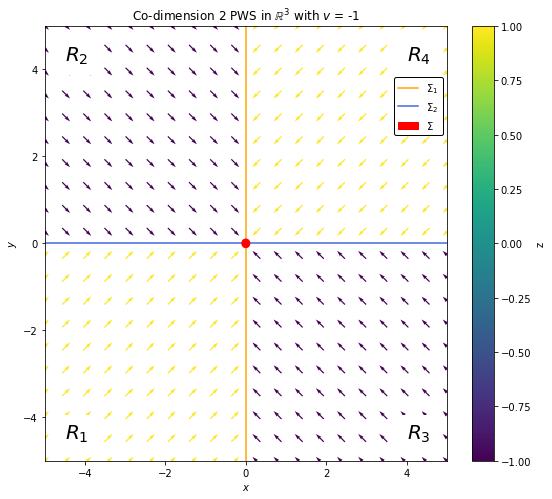

In [31]:
xvals = np.linspace(-5,5,20)
yvals = np.linspace(-5,5,20)
x,y = np.meshgrid(xvals,yvals)

def h1(x):
    return x[0]
def h2(x):
    return x[1]

def toy_R1(x,y):
    return  np.array([+1,+1,+1])
def toy_R2(x,y):
    return  np.array([+1,-1,vz])
def toy_R3(x,y):
    return  np.array([-1,+1,vz])
def toy_R4(x,y):
    return  np.array([-1,-1,+1])

def discts_field_pw_cons(x,y):
    xy = (x,y)
    ur1 = np.where((h1(xy) < 0) & (h2(xy) < 0), toy_R1(x,y)[0] ,0)
    ur2 = np.where((h1(xy) < 0) & (h2(xy) > 0), toy_R2(x,y)[0] ,0)
    ur3 = np.where((h1(xy) > 0) & (h2(xy) < 0), toy_R3(x,y)[0] ,0)
    ur4 = np.where((h1(xy) > 0) & (h2(xy) > 0), toy_R4(x,y)[0] ,0)
    ufield = ur1+ur2+ur3+ur4
        
    vr1 = np.where((h1(xy) < 0) & (h2(xy) < 0), toy_R1(x,y)[1] ,0)
    vr2 = np.where((h1(xy) < 0) & (h2(xy) > 0), toy_R2(x,y)[1] ,0)
    vr3 = np.where((h1(xy) > 0) & (h2(xy) < 0), toy_R3(x,y)[1] ,0)
    vr4 = np.where((h1(xy) > 0) & (h2(xy) > 0), toy_R4(x,y)[1] ,0)
    vfield = vr1+vr2+vr3+vr4
    
    zr1 = np.where((h1(xy) < 0) & (h2(xy) < 0), toy_R1(x,y)[2] ,0)
    zr2 = np.where((h1(xy) < 0) & (h2(xy) > 0), toy_R2(x,y)[2] ,0)
    zr3 = np.where((h1(xy) > 0) & (h2(xy) < 0), toy_R3(x,y)[2] ,0)
    zr4 = np.where((h1(xy) > 0) & (h2(xy) > 0), toy_R4(x,y)[2] ,0)
    zfield = zr1+zr2+zr3+zr4
    
    return ufield,vfield,zfield


fig, ax = plt.subplots(1, figsize=squarefigsizelarge)

#vector field
vz = -1
u,v,z = discts_field_pw_cons(x,y)
vector_field = plt.quiver(x,y,u, v, z,cmap=my_cmap,pivot='mid')

#separating surfaces
plt.plot(0*yvals,yvals,label = '$\Sigma_1$',color=sigma1color)
plt.plot(xvals,0*xvals,label = '$\Sigma_2$',color=sigma2color)
# discontinuity surface
dot = plt.Circle((0, 0), 0.1, facecolor=sigmacolor, edgecolor=sigmacolor,label = '$\Sigma$',zorder=10)
ax.add_patch(dot)
#labels
plt.text(-4.5,-4.5,'$R_1$',backgroundcolor = 'w',fontsize = 20)
plt.text(-4.5,4.2,'$R_2$',backgroundcolor = 'w',fontsize = 20)
plt.text(4,-4.5,'$R_3$',backgroundcolor = 'w',fontsize = 20)
plt.text(4,4.2,'$R_4$',backgroundcolor = 'w',fontsize = 20)

ax.set_xlabel('$x$')
ax.set_ylabel('$y$')
plt.title("Co-dimension 2 PWS in $\mathbb{R}^3$"+" with $v$ = {}".format(vz))
fig.colorbar(vector_field,label = 'z')

legend = plt.legend(loc = (.87,.75),edgecolor="black")
legend.get_frame().set_alpha(1)

ax.margins(x=0,y=0)

Time Delay applied to circle vector field

In [11]:
def H(x):
    if x >= 0:
        return 1
    else:
        return 0

def h1(x):
    x,y = x[0],x[1]
    return x**2 + y**2 - 1

def circle_inside_delay(x,y):
    return  3*np.array([x**2,y])/norm2(x,y)

def circle_outside_delay(x,y):
    return  np.array([-x -3*y,-y**2 + 3*x])/norm2(x,y)

def values_before_zero(t,a=1,b=2):
    x = np.array([a,b])#np.array([a-t,b-t,c+t])
    return x

def circle_integrand(xy):
    x,y = xy[0],xy[1]
    return circle_inside_delay(x,y) + H(h1(xy))*(circle_outside_delay(x,y) - circle_inside_delay(x,y))

def circle_int1(x):
    return circle_integrand(x)[0]

def circle_int2(x):
    return circle_integrand(x)[1]

integrands = [circle_int1,circle_int2]

def integrate_avg(yy,t,delta,debug = False):
    # take average of the velocity of each particle in the previous t-delta time steps up     
    def integral(inte,int_range,t_range):
        
        vector_field_over_last_t_minus_delta = np.apply_along_axis(inte,1,int_range) 
        
        if debug:
            print('yy =',yy)
            print('t length =',len(t_range))
            #print('integrand3 = ',np.apply_along_axis(lambda x: integrand3(x,v),1,int_range))
            print('ratio=',len(t_range)*tstep/delta)
            print('time_range=',t_range)
            print('diff',t_range[-1] - t_range[0])
            print('int_range',int_range)
            print('shape x',np.shape(int_range[0]))
            
        return np.sum(vector_field_over_last_t_minus_delta,axis = 0)/len(int_range)
    
    # i = position of t in tt
    if np.where(tt == t) == []:
        raise Exception('No such value of t in tt')
    i = np.where(tt == t)[0][0]
    # j = position of t-delta in tt (rounded)
    j = np.argmin(np.abs((t-delta) - tt)) #- 1 #position of closest element in tt to t - delta
    difference = tt[0] - (t- delta) # if t - delta is less than the lowest in tt, we have to create new values

    if difference >= 0:
        prev_time = np.arange(t-delta, tstep ,tstep) #time range before zero
        prev_vals = np.row_stack([values_before_zero(t) for t in prev_time]) #values before zero
        
        time_range = np.hstack((prev_time,tt[0:i])) # all the time values in the relevant range (t-delta up to t) 
        integration_range = np.vstack((prev_vals,yy[0:i])) #the actual values of the particle over the relevant time

        avgs = []
        for inte in integrands:
            
            avgs +=  [integral(inte,integration_range,time_range)]## this might have to be len(integration_range)*tstep
            
        return np.array(avgs)

    elif difference < 0:
        time_range = tt[j:i]
        integration_range = yy[j:i]

        avgs = []
        for inte in integrands:
            avgs +=  [integral(inte,integration_range,time_range)]
            
        return np.array(avgs)
    
    else:
        print('error')


def delay_model(tt,delta,x0, debug = False):
    yy = np.zeros((n,len(values_before_zero(0,x0[0],x0[1])))) + values_before_zero(0,x0[0],x0[1])
    for i,t in enumerate(tqdm(tt,position=0,leave = False,desc = 'model')):
        velocity = integrate_avg(yy,t,delta,debug = debug)
        yy[i,:] = yy[i-1,:] + tstep*velocity
        if debug:
            print('velocity =',velocity)
            print('t = ',t)
    return yy



In [12]:
debug = 1

T = 20
tstep = 10**-2

delta =  10**-1 #0.018461538461538464
a,b = 2,1
x0 = (a,b)

n = int(T/tstep)
print('n =',n)

tt = np.linspace(0, T, n)

yyy_delay_circle = delay_model(tt,delta,x0,debug = debug)

fig, ax = plt.subplots(1, figsize=(8, 8))
ax.plot(tt, yyy_delay_circle[:,0],label='x')
ax.plot(tt, yyy_delay_circle[:,1],label='y')

plt.title("tstep = {}, delta = {}".format(tstep,delta))
ax.legend()
ax.figure.savefig("variable_delay.jpeg")

#plt.figure(figsize=(10,8))
#plt.plot(yyy_delay_circle[:,0],yyy_delay_circle[:,1],'--')

xvals = np.linspace(-3,3,20)
yvals = np.linspace(-3,3,20)
x,y = np.meshgrid(xvals,yvals)

def h1(x):
    x,y = x[0],x[1]
    return x**2 + y**2 - 1
#
#def circle_inside_delay(x,y=0):
 #   if callable(x):
  #      x,y = x[0],x[1]
   # return  
#def circle_outside_delay(x,y=0):
 #   if callable(x):
  #      print('called')
   #     x,y = x[0],x[1]
   # return  np.array([-x -y,-y**2 + 2*x])/norm2(x,y)

def discts_field_circle(x,y):
    xy = (x,y)
    u_inside = np.where((h1(xy) < 0), circle_inside_delay(x,y)[0] ,0)
    u_outside = np.where((h1(xy) > 0), circle_outside_delay(x,y)[0] ,0)
    ufield = u_inside + u_outside
        
    v_inside = np.where((h1(xy) < 0), circle_inside_delay(x,y)[1] ,0)
    v_outside = np.where((h1(xy) > 0), circle_outside_delay(x,y)[1] ,0)
    vfield = v_inside + v_outside
    
    return ufield,vfield

fig, ax = plt.subplots(1, figsize=squarefigsizelarge)
ax.set_xlabel('$x$')
ax.set_ylabel('$y$')

#vector field

u,v = discts_field_circle(x,y) 
vector_field = plt.quiver(x,y, u , v , norm2(u,v),cmap=my_cmap,pivot='mid')


plt.title("Co-dimension 1 PWS in $\mathbb{R}^2$ with labelled (non) sliding regions")

#separating surfaces
circ = plt.Circle((0, 0), 1, facecolor='none', edgecolor=sigma1color,label = '$\Sigma_1 = \Sigma$')
ax.add_patch(circ)

#special regions
linewidths = 6
alphas = 0.35

#labels
#r1circ = plt.text(-0.15,-0.05,'$R_-$',fontsize = 15)
#r1circ.set_bbox(dict(facecolor='w', alpha=0.75, edgecolor='white'))
#plt.text(-2.5,-2.5,'$R_+$',backgroundcolor = 'w',fontsize = 15)


fig.colorbar(vector_field,label = 'Speed')

legend = plt.legend(loc= 'upper right',edgecolor="black")
legend.get_frame().set_alpha(1)

ax.margins(x=0,y=0)

plt.quiver(yyy_delay_circle[:-1,0],yyy_delay_circle[:-1,1],
         yyy_delay_circle[1:,0] - yyy_delay_circle[:-1,0],
         yyy_delay_circle[1:,1] - yyy_delay_circle[:-1,1],
         scale_units='xy',
         angles='xy', scale=1,color = trajectorycolor,headwidth = 5)

n = 2000


model:   0%|                                                                                  | 0/2000 [00:00<?, ?it/s]

yy = [[2. 1.]
 [2. 1.]
 [2. 1.]
 ...
 [2. 1.]
 [2. 1.]
 [2. 1.]]
t length = 11
ratio= 1.0999999999999999
time_range= [-1.00000000e-01 -9.00000000e-02 -8.00000000e-02 -7.00000000e-02
 -6.00000000e-02 -5.00000000e-02 -4.00000000e-02 -3.00000000e-02
 -2.00000000e-02 -1.00000000e-02 -5.55111512e-17]
diff 0.09999999999999995
int_range [[1. 2.]
 [1. 2.]
 [1. 2.]
 [1. 2.]
 [1. 2.]
 [1. 2.]
 [1. 2.]
 [1. 2.]
 [1. 2.]
 [1. 2.]
 [1. 2.]]
shape x (2,)
yy = [[2. 1.]
 [2. 1.]
 [2. 1.]
 ...
 [2. 1.]
 [2. 1.]
 [2. 1.]]
t length = 11
ratio= 1.0999999999999999
time_range= [-1.00000000e-01 -9.00000000e-02 -8.00000000e-02 -7.00000000e-02
 -6.00000000e-02 -5.00000000e-02 -4.00000000e-02 -3.00000000e-02
 -2.00000000e-02 -1.00000000e-02 -5.55111512e-17]
diff 0.09999999999999995
int_range [[1. 2.]
 [1. 2.]
 [1. 2.]
 [1. 2.]
 [1. 2.]
 [1. 2.]
 [1. 2.]
 [1. 2.]
 [1. 2.]
 [1. 2.]
 [1. 2.]]
shape x (2,)
velocity = [-3.13049517 -0.4472136 ]
t =  0.0
yy = [[1.96869505 0.99552786]
 [2.         1.        ]
 [2.     

model:   0%|                                                                          | 2/2000 [00:00<01:45, 18.92it/s]

yy = [[1.96869505 0.99552786]
 [1.93819402 0.99348767]
 [2.         1.        ]
 ...
 [2.         1.        ]
 [2.         1.        ]
 [2.         1.        ]]
t length = 11
ratio= 1.0999999999999999
time_range= [-7.99899950e-02 -6.99899950e-02 -5.99899950e-02 -4.99899950e-02
 -3.99899950e-02 -2.99899950e-02 -1.99899950e-02 -9.98999500e-03
  1.00050025e-05  0.00000000e+00  1.00050025e-02]
diff 0.08999499749874938
int_range [[1.         2.        ]
 [1.         2.        ]
 [1.         2.        ]
 [1.         2.        ]
 [1.         2.        ]
 [1.         2.        ]
 [1.         2.        ]
 [1.         2.        ]
 [1.         2.        ]
 [1.96869505 0.99552786]
 [1.93819402 0.99348767]]
shape x (2,)
yy = [[1.96869505 0.99552786]
 [1.93819402 0.99348767]
 [2.         1.        ]
 ...
 [2.         1.        ]
 [2.         1.        ]
 [2.         1.        ]]
t length = 11
ratio= 1.0999999999999999
time_range= [-7.99899950e-02 -6.99899950e-02 -5.99899950e-02 -4.99899950e-02
 -3.9

model:   0%|▏                                                                         | 4/2000 [00:00<01:50, 18.05it/s]

yy = [[1.96869505 0.99552786]
 [1.93819402 0.99348767]
 [1.90848585 0.99386907]
 ...
 [2.         1.        ]
 [2.         1.        ]
 [2.         1.        ]]
t length = 11
ratio= 1.0999999999999999
time_range= [-5.99799900e-02 -4.99799900e-02 -3.99799900e-02 -2.99799900e-02
 -1.99799900e-02 -9.97998999e-03  2.00100050e-05  0.00000000e+00
  1.00050025e-02  2.00100050e-02  3.00150075e-02]
diff 0.08999499749874938
int_range [[1.         2.        ]
 [1.         2.        ]
 [1.         2.        ]
 [1.         2.        ]
 [1.         2.        ]
 [1.         2.        ]
 [1.         2.        ]
 [1.96869505 0.99552786]
 [1.93819402 0.99348767]
 [1.90848585 0.99386907]
 [1.87955758 0.99665863]]
shape x (2,)
yy = [[1.96869505 0.99552786]
 [1.93819402 0.99348767]
 [1.90848585 0.99386907]
 ...
 [2.         1.        ]
 [2.         1.        ]
 [2.         1.        ]]
t length = 11
ratio= 1.0999999999999999
time_range= [-5.99799900e-02 -4.99799900e-02 -3.99799900e-02 -2.99799900e-02
 -1.9

model:   0%|▏                                                                         | 6/2000 [00:00<01:56, 17.17it/s]

yy = [[1.96869505 0.99552786]
 [1.93819402 0.99348767]
 [1.90848585 0.99386907]
 ...
 [2.         1.        ]
 [2.         1.        ]
 [2.         1.        ]]
t length = 11
ratio= 1.0999999999999999
time_range= [-3.99699850e-02 -2.99699850e-02 -1.99699850e-02 -9.96998499e-03
  3.00150075e-05  0.00000000e+00  1.00050025e-02  2.00100050e-02
  3.00150075e-02  4.00200100e-02  5.00250125e-02]
diff 0.08999499749874937
int_range [[1.         2.        ]
 [1.         2.        ]
 [1.         2.        ]
 [1.         2.        ]
 [1.         2.        ]
 [1.96869505 0.99552786]
 [1.93819402 0.99348767]
 [1.90848585 0.99386907]
 [1.87955758 0.99665863]
 [1.8513944  1.00183976]
 [1.82397964 1.00939262]]
shape x (2,)
yy = [[1.96869505 0.99552786]
 [1.93819402 0.99348767]
 [1.90848585 0.99386907]
 ...
 [2.         1.        ]
 [2.         1.        ]
 [2.         1.        ]]
t length = 11
ratio= 1.0999999999999999
time_range= [-3.99699850e-02 -2.99699850e-02 -1.99699850e-02 -9.96998499e-03
  3.0

model:   0%|▎                                                                         | 8/2000 [00:00<01:53, 17.57it/s]

yy = [[1.96869505 0.99552786]
 [1.93819402 0.99348767]
 [1.90848585 0.99386907]
 ...
 [2.         1.        ]
 [2.         1.        ]
 [2.         1.        ]]
t length = 11
ratio= 1.0999999999999999
time_range= [-1.99599800e-02 -9.95997999e-03  4.00200100e-05  0.00000000e+00
  1.00050025e-02  2.00100050e-02  3.00150075e-02  4.00200100e-02
  5.00250125e-02  6.00300150e-02  7.00350175e-02]
diff 0.08999499749874938
int_range [[1.         2.        ]
 [1.         2.        ]
 [1.         2.        ]
 [1.96869505 0.99552786]
 [1.93819402 0.99348767]
 [1.90848585 0.99386907]
 [1.87955758 0.99665863]
 [1.8513944  1.00183976]
 [1.82397964 1.00939262]
 [1.79729481 1.01929396]
 [1.77131971 1.03151705]]
shape x (2,)
yy = [[1.96869505 0.99552786]
 [1.93819402 0.99348767]
 [1.90848585 0.99386907]
 ...
 [2.         1.        ]
 [2.         1.        ]
 [2.         1.        ]]
t length = 11
ratio= 1.0999999999999999
time_range= [-1.99599800e-02 -9.95997999e-03  4.00200100e-05  0.00000000e+00
  1.0

model:   0%|▎                                                                        | 10/2000 [00:00<01:51, 17.86it/s]

yy = [[1.96869505 0.99552786]
 [1.93819402 0.99348767]
 [1.90848585 0.99386907]
 ...
 [2.         1.        ]
 [2.         1.        ]
 [2.         1.        ]]
t length = 10
ratio= 1.0
time_range= [0.         0.010005   0.02001001 0.03001501 0.04002001 0.05002501
 0.06003002 0.07003502 0.08004002 0.09004502]
diff 0.09004502251125562
int_range [[1.96869505 0.99552786]
 [1.93819402 0.99348767]
 [1.90848585 0.99386907]
 [1.87955758 0.99665863]
 [1.8513944  1.00183976]
 [1.82397964 1.00939262]
 [1.79729481 1.01929396]
 [1.77131971 1.03151705]
 [1.74603247 1.04603158]
 [1.72140968 1.06280351]]
shape x (2,)
yy = [[1.96869505 0.99552786]
 [1.93819402 0.99348767]
 [1.90848585 0.99386907]
 ...
 [2.         1.        ]
 [2.         1.        ]
 [2.         1.        ]]
t length = 10
ratio= 1.0
time_range= [0.         0.010005   0.02001001 0.03001501 0.04002001 0.05002501
 0.06003002 0.07003502 0.08004002 0.09004502]
diff 0.09004502251125562
int_range [[1.96869505 0.99552786]
 [1.93819402 0.9934

model:   1%|▍                                                                        | 12/2000 [00:00<01:51, 17.82it/s]

yy = [[1.96869505 0.99552786]
 [1.93819402 0.99348767]
 [1.90848585 0.99386907]
 ...
 [2.         1.        ]
 [2.         1.        ]
 [2.         1.        ]]
t length = 10
ratio= 1.0
time_range= [0.02001001 0.03001501 0.04002001 0.05002501 0.06003002 0.07003502
 0.08004002 0.09004502 0.10005003 0.11005503]
diff 0.09004502251125562
int_range [[1.90848585 0.99386907]
 [1.87955758 0.99665863]
 [1.8513944  1.00183976]
 [1.82397964 1.00939262]
 [1.79729481 1.01929396]
 [1.77131971 1.03151705]
 [1.74603247 1.04603158]
 [1.72140968 1.06280351]
 [1.69815868 1.0841414 ]
 [1.67469666 1.10519659]]
shape x (2,)
yy = [[1.96869505 0.99552786]
 [1.93819402 0.99348767]
 [1.90848585 0.99386907]
 ...
 [2.         1.        ]
 [2.         1.        ]
 [2.         1.        ]]
t length = 10
ratio= 1.0
time_range= [0.02001001 0.03001501 0.04002001 0.05002501 0.06003002 0.07003502
 0.08004002 0.09004502 0.10005003 0.11005503]
diff 0.09004502251125562
int_range [[1.90848585 0.99386907]
 [1.87955758 0.9966

model:   1%|▌                                                                        | 14/2000 [00:00<01:49, 18.09it/s]

yy = [[1.96869505 0.99552786]
 [1.93819402 0.99348767]
 [1.90848585 0.99386907]
 ...
 [2.         1.        ]
 [2.         1.        ]
 [2.         1.        ]]
t length = 10
ratio= 1.0
time_range= [0.04002001 0.05002501 0.06003002 0.07003502 0.08004002 0.09004502
 0.10005003 0.11005503 0.12006003 0.13006503]
diff 0.09004502251125562
int_range [[1.8513944  1.00183976]
 [1.82397964 1.00939262]
 [1.79729481 1.01929396]
 [1.77131971 1.03151705]
 [1.74603247 1.04603158]
 [1.72140968 1.06280351]
 [1.69815868 1.0841414 ]
 [1.67469666 1.10519659]
 [1.65100593 1.12593041]
 [1.62707138 1.14630661]]
shape x (2,)
yy = [[1.96869505 0.99552786]
 [1.93819402 0.99348767]
 [1.90848585 0.99386907]
 ...
 [2.         1.        ]
 [2.         1.        ]
 [2.         1.        ]]
t length = 10
ratio= 1.0
time_range= [0.04002001 0.05002501 0.06003002 0.07003502 0.08004002 0.09004502
 0.10005003 0.11005503 0.12006003 0.13006503]
diff 0.09004502251125562
int_range [[1.8513944  1.00183976]
 [1.82397964 1.0093

model:   1%|▌                                                                        | 16/2000 [00:00<01:47, 18.48it/s]

yy = [[1.96869505 0.99552786]
 [1.93819402 0.99348767]
 [1.90848585 0.99386907]
 ...
 [2.         1.        ]
 [2.         1.        ]
 [2.         1.        ]]
t length = 10
ratio= 1.0
time_range= [0.06003002 0.07003502 0.08004002 0.09004502 0.10005003 0.11005503
 0.12006003 0.13006503 0.14007004 0.15007504]
diff 0.09004502251125561
int_range [[1.79729481 1.01929396]
 [1.77131971 1.03151705]
 [1.74603247 1.04603158]
 [1.72140968 1.06280351]
 [1.69815868 1.0841414 ]
 [1.67469666 1.10519659]
 [1.65100593 1.12593041]
 [1.62707138 1.14630661]
 [1.60288041 1.16629155]
 [1.57842301 1.18585442]]
shape x (2,)
yy = [[1.96869505 0.99552786]
 [1.93819402 0.99348767]
 [1.90848585 0.99386907]
 ...
 [2.         1.        ]
 [2.         1.        ]
 [2.         1.        ]]
t length = 10
ratio= 1.0
time_range= [0.06003002 0.07003502 0.08004002 0.09004502 0.10005003 0.11005503
 0.12006003 0.13006503 0.14007004 0.15007504]
diff 0.09004502251125561
int_range [[1.79729481 1.01929396]
 [1.77131971 1.0315

model:   1%|▋                                                                        | 18/2000 [00:01<01:46, 18.61it/s]

yy = [[1.96869505 0.99552786]
 [1.93819402 0.99348767]
 [1.90848585 0.99386907]
 ...
 [2.         1.        ]
 [2.         1.        ]
 [2.         1.        ]]
t length = 10
ratio= 1.0
time_range= [0.08004002 0.09004502 0.10005003 0.11005503 0.12006003 0.13006503
 0.14007004 0.15007504 0.16008004 0.17008504]
diff 0.09004502251125564
int_range [[1.74603247 1.04603158]
 [1.72140968 1.06280351]
 [1.69815868 1.0841414 ]
 [1.67469666 1.10519659]
 [1.65100593 1.12593041]
 [1.62707138 1.14630661]
 [1.60288041 1.16629155]
 [1.57842301 1.18585442]
 [1.55369168 1.20496739]
 [1.52868142 1.2236058 ]]
shape x (2,)
yy = [[1.96869505 0.99552786]
 [1.93819402 0.99348767]
 [1.90848585 0.99386907]
 ...
 [2.         1.        ]
 [2.         1.        ]
 [2.         1.        ]]
t length = 10
ratio= 1.0
time_range= [0.08004002 0.09004502 0.10005003 0.11005503 0.12006003 0.13006503
 0.14007004 0.15007504 0.16008004 0.17008504]
diff 0.09004502251125564
int_range [[1.74603247 1.04603158]
 [1.72140968 1.0628

model:   1%|▋                                                                        | 20/2000 [00:01<01:46, 18.60it/s]

yy = [[1.96869505 0.99552786]
 [1.93819402 0.99348767]
 [1.90848585 0.99386907]
 ...
 [2.         1.        ]
 [2.         1.        ]
 [2.         1.        ]]
t length = 10
ratio= 1.0
time_range= [0.10005003 0.11005503 0.12006003 0.13006503 0.14007004 0.15007504
 0.16008004 0.17008504 0.18009005 0.19009505]
diff 0.09004502251125564
int_range [[1.69815868 1.0841414 ]
 [1.67469666 1.10519659]
 [1.65100593 1.12593041]
 [1.62707138 1.14630661]
 [1.60288041 1.16629155]
 [1.57842301 1.18585442]
 [1.55369168 1.20496739]
 [1.52868142 1.2236058 ]
 [1.5033896  1.24174833]
 [1.4778159  1.25937717]]
shape x (2,)
yy = [[1.96869505 0.99552786]
 [1.93819402 0.99348767]
 [1.90848585 0.99386907]
 ...
 [2.         1.        ]
 [2.         1.        ]
 [2.         1.        ]]
t length = 10
ratio= 1.0
time_range= [0.10005003 0.11005503 0.12006003 0.13006503 0.14007004 0.15007504
 0.16008004 0.17008504 0.18009005 0.19009505]
diff 0.09004502251125564
int_range [[1.69815868 1.0841414 ]
 [1.67469666 1.1051

model:   1%|▊                                                                        | 22/2000 [00:01<01:46, 18.64it/s]

yy = [[1.96869505 0.99552786]
 [1.93819402 0.99348767]
 [1.90848585 0.99386907]
 ...
 [2.         1.        ]
 [2.         1.        ]
 [2.         1.        ]]
t length = 10
ratio= 1.0
time_range= [0.12006003 0.13006503 0.14007004 0.15007504 0.16008004 0.17008504
 0.18009005 0.19009505 0.20010005 0.21010505]
diff 0.09004502251125562
int_range [[1.65100593 1.12593041]
 [1.62707138 1.14630661]
 [1.60288041 1.16629155]
 [1.57842301 1.18585442]
 [1.55369168 1.20496739]
 [1.52868142 1.2236058 ]
 [1.5033896  1.24174833]
 [1.4778159  1.25937717]
 [1.45196215 1.27647818]
 [1.42583379 1.29304423]]
shape x (2,)
yy = [[1.96869505 0.99552786]
 [1.93819402 0.99348767]
 [1.90848585 0.99386907]
 ...
 [2.         1.        ]
 [2.         1.        ]
 [2.         1.        ]]
t length = 10
ratio= 1.0
time_range= [0.12006003 0.13006503 0.14007004 0.15007504 0.16008004 0.17008504
 0.18009005 0.19009505 0.20010005 0.21010505]
diff 0.09004502251125562
int_range [[1.65100593 1.12593041]
 [1.62707138 1.1463

model:   1%|▉                                                                        | 24/2000 [00:01<01:46, 18.61it/s]

yy = [[1.96869505 0.99552786]
 [1.93819402 0.99348767]
 [1.90848585 0.99386907]
 ...
 [2.         1.        ]
 [2.         1.        ]
 [2.         1.        ]]
t length = 10
ratio= 1.0
time_range= [0.14007004 0.15007504 0.16008004 0.17008504 0.18009005 0.19009505
 0.20010005 0.21010505 0.22011006 0.23011506]
diff 0.09004502251125562
int_range [[1.60288041 1.16629155]
 [1.57842301 1.18585442]
 [1.55369168 1.20496739]
 [1.52868142 1.2236058 ]
 [1.5033896  1.24174833]
 [1.4778159  1.25937717]
 [1.45196215 1.27647818]
 [1.42583379 1.29304423]
 [1.3994364  1.30906879]
 [1.37277575 1.32454581]]
shape x (2,)
yy = [[1.96869505 0.99552786]
 [1.93819402 0.99348767]
 [1.90848585 0.99386907]
 ...
 [2.         1.        ]
 [2.         1.        ]
 [2.         1.        ]]
t length = 10
ratio= 1.0
time_range= [0.14007004 0.15007504 0.16008004 0.17008504 0.18009005 0.19009505
 0.20010005 0.21010505 0.22011006 0.23011506]
diff 0.09004502251125562
int_range [[1.60288041 1.16629155]
 [1.57842301 1.1858

model:   1%|▉                                                                        | 26/2000 [00:01<01:45, 18.65it/s]

yy = [[1.96869505 0.99552786]
 [1.93819402 0.99348767]
 [1.90848585 0.99386907]
 ...
 [2.         1.        ]
 [2.         1.        ]
 [2.         1.        ]]
t length = 10
ratio= 1.0
time_range= [0.16008004 0.17008504 0.18009005 0.19009505 0.20010005 0.21010505
 0.22011006 0.23011506 0.24012006 0.25012506]
diff 0.09004502251125565
int_range [[1.55369168 1.20496739]
 [1.52868142 1.2236058 ]
 [1.5033896  1.24174833]
 [1.4778159  1.25937717]
 [1.45196215 1.27647818]
 [1.42583379 1.29304423]
 [1.3994364  1.30906879]
 [1.37277575 1.32454581]
 [1.34585772 1.33946977]
 [1.31868831 1.35383558]]
shape x (2,)
yy = [[1.96869505 0.99552786]
 [1.93819402 0.99348767]
 [1.90848585 0.99386907]
 ...
 [2.         1.        ]
 [2.         1.        ]
 [2.         1.        ]]
t length = 10
ratio= 1.0
time_range= [0.16008004 0.17008504 0.18009005 0.19009505 0.20010005 0.21010505
 0.22011006 0.23011506 0.24012006 0.25012506]
diff 0.09004502251125565
int_range [[1.55369168 1.20496739]
 [1.52868142 1.2236

model:   1%|█                                                                        | 28/2000 [00:01<01:47, 18.27it/s]

yy = [[1.96869505 0.99552786]
 [1.93819402 0.99348767]
 [1.90848585 0.99386907]
 ...
 [2.         1.        ]
 [2.         1.        ]
 [2.         1.        ]]
t length = 10
ratio= 1.0
time_range= [0.18009005 0.19009505 0.20010005 0.21010505 0.22011006 0.23011506
 0.24012006 0.25012506 0.26013007 0.27013507]
diff 0.09004502251125562
int_range [[1.5033896  1.24174833]
 [1.4778159  1.25937717]
 [1.45196215 1.27647818]
 [1.42583379 1.29304423]
 [1.3994364  1.30906879]
 [1.37277575 1.32454581]
 [1.34585772 1.33946977]
 [1.31868831 1.35383558]
 [1.2912736  1.36763861]
 [1.26361976 1.38087459]]
shape x (2,)
yy = [[1.96869505 0.99552786]
 [1.93819402 0.99348767]
 [1.90848585 0.99386907]
 ...
 [2.         1.        ]
 [2.         1.        ]
 [2.         1.        ]]
t length = 10
ratio= 1.0
time_range= [0.18009005 0.19009505 0.20010005 0.21010505 0.22011006 0.23011506
 0.24012006 0.25012506 0.26013007 0.27013507]
diff 0.09004502251125562
int_range [[1.5033896  1.24174833]
 [1.4778159  1.2593

model:   2%|█                                                                        | 30/2000 [00:01<01:51, 17.63it/s]

yy = [[1.96869505 0.99552786]
 [1.93819402 0.99348767]
 [1.90848585 0.99386907]
 ...
 [2.         1.        ]
 [2.         1.        ]
 [2.         1.        ]]
t length = 10
ratio= 1.0
time_range= [0.20010005 0.21010505 0.22011006 0.23011506 0.24012006 0.25012506
 0.26013007 0.27013507 0.28014007 0.29014507]
diff 0.09004502251125565
int_range [[1.45196215 1.27647818]
 [1.42583379 1.29304423]
 [1.3994364  1.30906879]
 [1.37277575 1.32454581]
 [1.34585772 1.33946977]
 [1.31868831 1.35383558]
 [1.2912736  1.36763861]
 [1.26361976 1.38087459]
 [1.23573304 1.39353965]
 [1.20761973 1.40563024]]
shape x (2,)
yy = [[1.96869505 0.99552786]
 [1.93819402 0.99348767]
 [1.90848585 0.99386907]
 ...
 [2.         1.        ]
 [2.         1.        ]
 [2.         1.        ]]
t length = 10
ratio= 1.0
time_range= [0.20010005 0.21010505 0.22011006 0.23011506 0.24012006 0.25012506
 0.26013007 0.27013507 0.28014007 0.29014507]
diff 0.09004502251125565
int_range [[1.45196215 1.27647818]
 [1.42583379 1.2930

model:   2%|█▏                                                                       | 32/2000 [00:01<01:50, 17.81it/s]

yy = [[1.96869505 0.99552786]
 [1.93819402 0.99348767]
 [1.90848585 0.99386907]
 ...
 [2.         1.        ]
 [2.         1.        ]
 [2.         1.        ]]
t length = 10
ratio= 1.0
time_range= [0.22011006 0.23011506 0.24012006 0.25012506 0.26013007 0.27013507
 0.28014007 0.29014507 0.30015008 0.31015508]
diff 0.09004502251125562
int_range [[1.3994364  1.30906879]
 [1.37277575 1.32454581]
 [1.34585772 1.33946977]
 [1.31868831 1.35383558]
 [1.2912736  1.36763861]
 [1.26361976 1.38087459]
 [1.23573304 1.39353965]
 [1.20761973 1.40563024]
 [1.17928619 1.41714312]
 [1.15073882 1.42807535]]
shape x (2,)
yy = [[1.96869505 0.99552786]
 [1.93819402 0.99348767]
 [1.90848585 0.99386907]
 ...
 [2.         1.        ]
 [2.         1.        ]
 [2.         1.        ]]
t length = 10
ratio= 1.0
time_range= [0.22011006 0.23011506 0.24012006 0.25012506 0.26013007 0.27013507
 0.28014007 0.29014507 0.30015008 0.31015508]
diff 0.09004502251125562
int_range [[1.3994364  1.30906879]
 [1.37277575 1.3245

model:   2%|█▏                                                                       | 34/2000 [00:01<01:49, 17.98it/s]

yy = [[1.96869505 0.99552786]
 [1.93819402 0.99348767]
 [1.90848585 0.99386907]
 ...
 [2.         1.        ]
 [2.         1.        ]
 [2.         1.        ]]
t length = 10
ratio= 1.0
time_range= [0.24012006 0.25012506 0.26013007 0.27013507 0.28014007 0.29014507
 0.30015008 0.31015508 0.32016008 0.33016508]
diff 0.09004502251125562
int_range [[1.34585772 1.33946977]
 [1.31868831 1.35383558]
 [1.2912736  1.36763861]
 [1.26361976 1.38087459]
 [1.23573304 1.39353965]
 [1.20761973 1.40563024]
 [1.17928619 1.41714312]
 [1.15073882 1.42807535]
 [1.1219841  1.43842428]
 [1.09302854 1.44818752]]
shape x (2,)
yy = [[1.96869505 0.99552786]
 [1.93819402 0.99348767]
 [1.90848585 0.99386907]
 ...
 [2.         1.        ]
 [2.         1.        ]
 [2.         1.        ]]
t length = 10
ratio= 1.0
time_range= [0.24012006 0.25012506 0.26013007 0.27013507 0.28014007 0.29014507
 0.30015008 0.31015508 0.32016008 0.33016508]
diff 0.09004502251125562
int_range [[1.34585772 1.33946977]
 [1.31868831 1.3538

model:   2%|█▎                                                                       | 36/2000 [00:01<01:48, 18.15it/s]

yy = [[1.96869505 0.99552786]
 [1.93819402 0.99348767]
 [1.90848585 0.99386907]
 ...
 [2.         1.        ]
 [2.         1.        ]
 [2.         1.        ]]
t length = 10
ratio= 1.0
time_range= [0.26013007 0.27013507 0.28014007 0.29014507 0.30015008 0.31015508
 0.32016008 0.33016508 0.34017009 0.35017509]
diff 0.09004502251125562
int_range [[1.2912736  1.36763861]
 [1.26361976 1.38087459]
 [1.23573304 1.39353965]
 [1.20761973 1.40563024]
 [1.17928619 1.41714312]
 [1.15073882 1.42807535]
 [1.1219841  1.43842428]
 [1.09302854 1.44818752]
 [1.06387872 1.45736292]
 [1.03454129 1.46594861]]
shape x (2,)
yy = [[1.96869505 0.99552786]
 [1.93819402 0.99348767]
 [1.90848585 0.99386907]
 ...
 [2.         1.        ]
 [2.         1.        ]
 [2.         1.        ]]
t length = 10
ratio= 1.0
time_range= [0.26013007 0.27013507 0.28014007 0.29014507 0.30015008 0.31015508
 0.32016008 0.33016508 0.34017009 0.35017509]
diff 0.09004502251125562
int_range [[1.2912736  1.36763861]
 [1.26361976 1.3808

model:   2%|█▍                                                                       | 38/2000 [00:02<01:47, 18.27it/s]

yy = [[1.96869505 0.99552786]
 [1.93819402 0.99348767]
 [1.90848585 0.99386907]
 ...
 [2.         1.        ]
 [2.         1.        ]
 [2.         1.        ]]
t length = 10
ratio= 1.0
time_range= [0.28014007 0.29014507 0.30015008 0.31015508 0.32016008 0.33016508
 0.34017009 0.35017509 0.36018009 0.37018509]
diff 0.09004502251125562
int_range [[1.23573304 1.39353965]
 [1.20761973 1.40563024]
 [1.17928619 1.41714312]
 [1.15073882 1.42807535]
 [1.1219841  1.43842428]
 [1.09302854 1.44818752]
 [1.06387872 1.45736292]
 [1.03454129 1.46594861]
 [1.00502294 1.47394291]
 [0.97533047 1.48134439]]
shape x (2,)
yy = [[1.96869505 0.99552786]
 [1.93819402 0.99348767]
 [1.90848585 0.99386907]
 ...
 [2.         1.        ]
 [2.         1.        ]
 [2.         1.        ]]
t length = 10
ratio= 1.0
time_range= [0.28014007 0.29014507 0.30015008 0.31015508 0.32016008 0.33016508
 0.34017009 0.35017509 0.36018009 0.37018509]
diff 0.09004502251125562
int_range [[1.23573304 1.39353965]
 [1.20761973 1.4056

model:   2%|█▍                                                                       | 40/2000 [00:02<01:46, 18.36it/s]

yy = [[1.96869505 0.99552786]
 [1.93819402 0.99348767]
 [1.90848585 0.99386907]
 ...
 [2.         1.        ]
 [2.         1.        ]
 [2.         1.        ]]
t length = 10
ratio= 1.0
time_range= [0.30015008 0.31015508 0.32016008 0.33016508 0.34017009 0.35017509
 0.36018009 0.37018509 0.3801901  0.3901951 ]
diff 0.09004502251125562
int_range [[1.17928619 1.41714312]
 [1.15073882 1.42807535]
 [1.1219841  1.43842428]
 [1.09302854 1.44818752]
 [1.06387872 1.45736292]
 [1.03454129 1.46594861]
 [1.00502294 1.47394291]
 [0.97533047 1.48134439]
 [0.94547071 1.48815182]
 [0.91545061 1.49436416]]
shape x (2,)
yy = [[1.96869505 0.99552786]
 [1.93819402 0.99348767]
 [1.90848585 0.99386907]
 ...
 [2.         1.        ]
 [2.         1.        ]
 [2.         1.        ]]
t length = 10
ratio= 1.0
time_range= [0.30015008 0.31015508 0.32016008 0.33016508 0.34017009 0.35017509
 0.36018009 0.37018509 0.3801901  0.3901951 ]
diff 0.09004502251125562
int_range [[1.17928619 1.41714312]
 [1.15073882 1.4280

model:   2%|█▌                                                                       | 42/2000 [00:02<01:46, 18.32it/s]

yy = [[1.96869505 0.99552786]
 [1.93819402 0.99348767]
 [1.90848585 0.99386907]
 ...
 [2.         1.        ]
 [2.         1.        ]
 [2.         1.        ]]
t length = 10
ratio= 1.0
time_range= [0.32016008 0.33016508 0.34017009 0.35017509 0.36018009 0.37018509
 0.3801901  0.3901951  0.4002001  0.4102051 ]
diff 0.09004502251125562
int_range [[1.1219841  1.43842428]
 [1.09302854 1.44818752]
 [1.06387872 1.45736292]
 [1.03454129 1.46594861]
 [1.00502294 1.47394291]
 [0.97533047 1.48134439]
 [0.94547071 1.48815182]
 [0.91545061 1.49436416]
 [0.88527717 1.49998056]
 [0.85495753 1.50500036]]
shape x (2,)
yy = [[1.96869505 0.99552786]
 [1.93819402 0.99348767]
 [1.90848585 0.99386907]
 ...
 [2.         1.        ]
 [2.         1.        ]
 [2.         1.        ]]
t length = 10
ratio= 1.0
time_range= [0.32016008 0.33016508 0.34017009 0.35017509 0.36018009 0.37018509
 0.3801901  0.3901951  0.4002001  0.4102051 ]
diff 0.09004502251125562
int_range [[1.1219841  1.43842428]
 [1.09302854 1.4481

model:   2%|█▌                                                                       | 44/2000 [00:02<01:44, 18.76it/s]

yy = [[1.96869505 0.99552786]
 [1.93819402 0.99348767]
 [1.90848585 0.99386907]
 ...
 [2.         1.        ]
 [2.         1.        ]
 [2.         1.        ]]
t length = 10
ratio= 1.0
time_range= [0.34017009 0.35017509 0.36018009 0.37018509 0.3801901  0.3901951
 0.4002001  0.4102051  0.42021011 0.43021511]
diff 0.09004502251125562
int_range [[1.06387872 1.45736292]
 [1.03454129 1.46594861]
 [1.00502294 1.47394291]
 [0.97533047 1.48134439]
 [0.94547071 1.48815182]
 [0.91545061 1.49436416]
 [0.88527717 1.49998056]
 [0.85495753 1.50500036]
 [0.82449888 1.50942305]
 [0.79390857 1.51324828]]
shape x (2,)
yy = [[1.96869505 0.99552786]
 [1.93819402 0.99348767]
 [1.90848585 0.99386907]
 ...
 [2.         1.        ]
 [2.         1.        ]
 [2.         1.        ]]
t length = 10
ratio= 1.0
time_range= [0.34017009 0.35017509 0.36018009 0.37018509 0.3801901  0.3901951
 0.4002001  0.4102051  0.42021011 0.43021511]
diff 0.09004502251125562
int_range [[1.06387872 1.45736292]
 [1.03454129 1.465948

model:   2%|█▋                                                                       | 46/2000 [00:02<01:43, 18.86it/s]

yy = [[1.96869505 0.99552786]
 [1.93819402 0.99348767]
 [1.90848585 0.99386907]
 ...
 [2.         1.        ]
 [2.         1.        ]
 [2.         1.        ]]
t length = 10
ratio= 1.0
time_range= [0.36018009 0.37018509 0.3801901  0.3901951  0.4002001  0.4102051
 0.42021011 0.43021511 0.44022011 0.45022511]
diff 0.09004502251125562
int_range [[1.00502294 1.47394291]
 [0.97533047 1.48134439]
 [0.94547071 1.48815182]
 [0.91545061 1.49436416]
 [0.88527717 1.49998056]
 [0.85495753 1.50500036]
 [0.82449888 1.50942305]
 [0.79390857 1.51324828]
 [0.76319403 1.51647586]
 [0.73236284 1.51910574]]
shape x (2,)
yy = [[1.96869505 0.99552786]
 [1.93819402 0.99348767]
 [1.90848585 0.99386907]
 ...
 [2.         1.        ]
 [2.         1.        ]
 [2.         1.        ]]
t length = 10
ratio= 1.0
time_range= [0.36018009 0.37018509 0.3801901  0.3901951  0.4002001  0.4102051
 0.42021011 0.43021511 0.44022011 0.45022511]
diff 0.09004502251125562
int_range [[1.00502294 1.47394291]
 [0.97533047 1.481344

model:   2%|█▊                                                                       | 48/2000 [00:02<01:49, 17.77it/s]

yy = [[1.96869505 0.99552786]
 [1.93819402 0.99348767]
 [1.90848585 0.99386907]
 ...
 [2.         1.        ]
 [2.         1.        ]
 [2.         1.        ]]
t length = 10
ratio= 1.0
time_range= [0.3801901  0.3901951  0.4002001  0.4102051  0.42021011 0.43021511
 0.44022011 0.45022511 0.46023012 0.47023512]
diff 0.09004502251125562
int_range [[0.94547071 1.48815182]
 [0.91545061 1.49436416]
 [0.88527717 1.49998056]
 [0.85495753 1.50500036]
 [0.82449888 1.50942305]
 [0.79390857 1.51324828]
 [0.76319403 1.51647586]
 [0.73236284 1.51910574]
 [0.70142273 1.52113799]
 [0.67038155 1.52257282]]
shape x (2,)
yy = [[1.96869505 0.99552786]
 [1.93819402 0.99348767]
 [1.90848585 0.99386907]
 ...
 [2.         1.        ]
 [2.         1.        ]
 [2.         1.        ]]
t length = 10
ratio= 1.0
time_range= [0.3801901  0.3901951  0.4002001  0.4102051  0.42021011 0.43021511
 0.44022011 0.45022511 0.46023012 0.47023512]
diff 0.09004502251125562
int_range [[0.94547071 1.48815182]
 [0.91545061 1.4943

model:   2%|█▊                                                                       | 50/2000 [00:02<01:52, 17.30it/s]

yy = [[1.96869505 0.99552786]
 [1.93819402 0.99348767]
 [1.90848585 0.99386907]
 ...
 [2.         1.        ]
 [2.         1.        ]
 [2.         1.        ]]
t length = 10
ratio= 1.0
time_range= [0.4002001  0.4102051  0.42021011 0.43021511 0.44022011 0.45022511
 0.46023012 0.47023512 0.48024012 0.49024512]
diff 0.09004502251125562
int_range [[0.88527717 1.49998056]
 [0.85495753 1.50500036]
 [0.82449888 1.50942305]
 [0.79390857 1.51324828]
 [0.76319403 1.51647586]
 [0.73236284 1.51910574]
 [0.70142273 1.52113799]
 [0.67038155 1.52257282]
 [0.63924734 1.52341056]
 [0.60802829 1.52365166]]
shape x (2,)
yy = [[1.96869505 0.99552786]
 [1.93819402 0.99348767]
 [1.90848585 0.99386907]
 ...
 [2.         1.        ]
 [2.         1.        ]
 [2.         1.        ]]
t length = 10
ratio= 1.0
time_range= [0.4002001  0.4102051  0.42021011 0.43021511 0.44022011 0.45022511
 0.46023012 0.47023512 0.48024012 0.49024512]
diff 0.09004502251125562
int_range [[0.88527717 1.49998056]
 [0.85495753 1.5050

model:   3%|█▉                                                                       | 52/2000 [00:02<01:51, 17.43it/s]

yy = [[1.96869505 0.99552786]
 [1.93819402 0.99348767]
 [1.90848585 0.99386907]
 ...
 [2.         1.        ]
 [2.         1.        ]
 [2.         1.        ]]
t length = 10
ratio= 1.0
time_range= [0.42021011 0.43021511 0.44022011 0.45022511 0.46023012 0.47023512
 0.48024012 0.49024512 0.50025013 0.51025513]
diff 0.09004502251125562
int_range [[0.82449888 1.50942305]
 [0.79390857 1.51324828]
 [0.76319403 1.51647586]
 [0.73236284 1.51910574]
 [0.70142273 1.52113799]
 [0.67038155 1.52257282]
 [0.63924734 1.52341056]
 [0.60802829 1.52365166]
 [0.5767328  1.52329669]
 [0.54536944 1.52234631]]
shape x (2,)
yy = [[1.96869505 0.99552786]
 [1.93819402 0.99348767]
 [1.90848585 0.99386907]
 ...
 [2.         1.        ]
 [2.         1.        ]
 [2.         1.        ]]
t length = 10
ratio= 1.0
time_range= [0.42021011 0.43021511 0.44022011 0.45022511 0.46023012 0.47023512
 0.48024012 0.49024512 0.50025013 0.51025513]
diff 0.09004502251125562
int_range [[0.82449888 1.50942305]
 [0.79390857 1.5132

model:   3%|█▉                                                                       | 54/2000 [00:02<01:50, 17.67it/s]

yy = [[1.96869505 0.99552786]
 [1.93819402 0.99348767]
 [1.90848585 0.99386907]
 ...
 [2.         1.        ]
 [2.         1.        ]
 [2.         1.        ]]
t length = 10
ratio= 1.0
time_range= [0.44022011 0.45022511 0.46023012 0.47023512 0.48024012 0.49024512
 0.50025013 0.51025513 0.52026013 0.53026513]
diff 0.09004502251125568
int_range [[0.76319403 1.51647586]
 [0.73236284 1.51910574]
 [0.70142273 1.52113799]
 [0.67038155 1.52257282]
 [0.63924734 1.52341056]
 [0.60802829 1.52365166]
 [0.5767328  1.52329669]
 [0.54536944 1.52234631]
 [0.51394702 1.5208013 ]
 [0.48247454 1.51866255]]
shape x (2,)
yy = [[1.96869505 0.99552786]
 [1.93819402 0.99348767]
 [1.90848585 0.99386907]
 ...
 [2.         1.        ]
 [2.         1.        ]
 [2.         1.        ]]
t length = 10
ratio= 1.0
time_range= [0.44022011 0.45022511 0.46023012 0.47023512 0.48024012 0.49024512
 0.50025013 0.51025513 0.52026013 0.53026513]
diff 0.09004502251125568
int_range [[0.76319403 1.51647586]
 [0.73236284 1.5191

model:   3%|██                                                                       | 56/2000 [00:03<01:52, 17.23it/s]

yy = [[1.96869505 0.99552786]
 [1.93819402 0.99348767]
 [1.90848585 0.99386907]
 ...
 [2.         1.        ]
 [2.         1.        ]
 [2.         1.        ]]
t length = 10
ratio= 1.0
time_range= [0.46023012 0.47023512 0.48024012 0.49024512 0.50025013 0.51025513
 0.52026013 0.53026513 0.54027014 0.55027514]
diff 0.09004502251125557
int_range [[0.70142273 1.52113799]
 [0.67038155 1.52257282]
 [0.63924734 1.52341056]
 [0.60802829 1.52365166]
 [0.5767328  1.52329669]
 [0.54536944 1.52234631]
 [0.51394702 1.5208013 ]
 [0.48247454 1.51866255]
 [0.45096128 1.51593106]
 [0.41941673 1.51260792]]
shape x (2,)
yy = [[1.96869505 0.99552786]
 [1.93819402 0.99348767]
 [1.90848585 0.99386907]
 ...
 [2.         1.        ]
 [2.         1.        ]
 [2.         1.        ]]
t length = 10
ratio= 1.0
time_range= [0.46023012 0.47023512 0.48024012 0.49024512 0.50025013 0.51025513
 0.52026013 0.53026513 0.54027014 0.55027514]
diff 0.09004502251125557
int_range [[0.70142273 1.52113799]
 [0.67038155 1.5225

model:   3%|██▏                                                                      | 59/2000 [00:03<01:48, 17.90it/s]

yy = [[1.96869505 0.99552786]
 [1.93819402 0.99348767]
 [1.90848585 0.99386907]
 ...
 [2.         1.        ]
 [2.         1.        ]
 [2.         1.        ]]
t length = 10
ratio= 1.0
time_range= [0.49024512 0.50025013 0.51025513 0.52026013 0.53026513 0.54027014
 0.55027514 0.56028014 0.57028514 0.58029015]
diff 0.09004502251125568
int_range [[0.60802829 1.52365166]
 [0.5767328  1.52329669]
 [0.54536944 1.52234631]
 [0.51394702 1.5208013 ]
 [0.48247454 1.51866255]
 [0.45096128 1.51593106]
 [0.41941673 1.51260792]
 [0.38785069 1.50869434]
 [0.35627319 1.50419165]
 [0.32469459 1.49910129]]
shape x (2,)
yy = [[1.96869505 0.99552786]
 [1.93819402 0.99348767]
 [1.90848585 0.99386907]
 ...
 [2.         1.        ]
 [2.         1.        ]
 [2.         1.        ]]
t length = 10
ratio= 1.0
time_range= [0.49024512 0.50025013 0.51025513 0.52026013 0.53026513 0.54027014
 0.55027514 0.56028014 0.57028514 0.58029015]
diff 0.09004502251125568
int_range [[0.60802829 1.52365166]
 [0.5767328  1.5232

model:   3%|██▏                                                                      | 61/2000 [00:03<01:51, 17.43it/s]

yy = [[1.96869505 0.99552786]
 [1.93819402 0.99348767]
 [1.90848585 0.99386907]
 ...
 [2.         1.        ]
 [2.         1.        ]
 [2.         1.        ]]
t length = 10
ratio= 1.0
time_range= [0.51025513 0.52026013 0.53026513 0.54027014 0.55027514 0.56028014
 0.57028514 0.58029015 0.59029515 0.60030015]
diff 0.09004502251125557
int_range [[0.54536944 1.52234631]
 [0.51394702 1.5208013 ]
 [0.48247454 1.51866255]
 [0.45096128 1.51593106]
 [0.41941673 1.51260792]
 [0.38785069 1.50869434]
 [0.35627319 1.50419165]
 [0.32469459 1.49910129]
 [0.29312555 1.4934248 ]
 [0.26157705 1.48716388]]
shape x (2,)
yy = [[1.96869505 0.99552786]
 [1.93819402 0.99348767]
 [1.90848585 0.99386907]
 ...
 [2.         1.        ]
 [2.         1.        ]
 [2.         1.        ]]
t length = 10
ratio= 1.0
time_range= [0.51025513 0.52026013 0.53026513 0.54027014 0.55027514 0.56028014
 0.57028514 0.58029015 0.59029515 0.60030015]
diff 0.09004502251125557
int_range [[0.54536944 1.52234631]
 [0.51394702 1.5208

model:   3%|██▎                                                                      | 63/2000 [00:03<01:50, 17.57it/s]

yy = [[1.96869505 0.99552786]
 [1.93819402 0.99348767]
 [1.90848585 0.99386907]
 ...
 [2.         1.        ]
 [2.         1.        ]
 [2.         1.        ]]
t length = 10
ratio= 1.0
time_range= [0.53026513 0.54027014 0.55027514 0.56028014 0.57028514 0.58029015
 0.59029515 0.60030015 0.61030515 0.62031016]
diff 0.09004502251125557
int_range [[0.48247454 1.51866255]
 [0.45096128 1.51593106]
 [0.41941673 1.51260792]
 [0.38785069 1.50869434]
 [0.35627319 1.50419165]
 [0.32469459 1.49910129]
 [0.29312555 1.4934248 ]
 [0.26157705 1.48716388]
 [0.2300604  1.48032033]
 [0.19858727 1.47289613]]
shape x (2,)
yy = [[1.96869505 0.99552786]
 [1.93819402 0.99348767]
 [1.90848585 0.99386907]
 ...
 [2.         1.        ]
 [2.         1.        ]
 [2.         1.        ]]
t length = 10
ratio= 1.0
time_range= [0.53026513 0.54027014 0.55027514 0.56028014 0.57028514 0.58029015
 0.59029515 0.60030015 0.61030515 0.62031016]
diff 0.09004502251125557
int_range 

KeyboardInterrupt: 